# Objective
Basic clustering and analysis for an SNR test image with the following properties:

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation

worker_marker_size = 4
cluster_marker_size = 40
bigger_window_size = True

csv_filepath = None
show_correctness_workers = False
show_correctness_clusters = False
correctness_threshold = None
show_NN_inc = False
show_ref_points = False

### Load data, get the dataframe 

In [2]:
img_filename = 'C2-ISP_293T_TFRC_InSituPrep_20180712_1_MMStack_Pos0_700_inv.png'
img_filepath = '/Users/jenny.vo-phamhi/Documents/StarFISH-tools/Annotation/C2-ISP_293T_TFRC_InSituPrep_20180712_1_MMStack_Pos0_700.png'
json_filepath = '/Users/jenny.vo-phamhi/Documents/StarFISH-tools/Annotation/smFISH_cells_inv.json'

ba = QuantiusAnnotation(json_filepath)
sa = SpotAnnotationAnalysis(ba)
anno_all = ba.df()
anno_one_image = ba.slice_by_image(anno_all, img_filename)

# Overview of Annotations 

### Image only

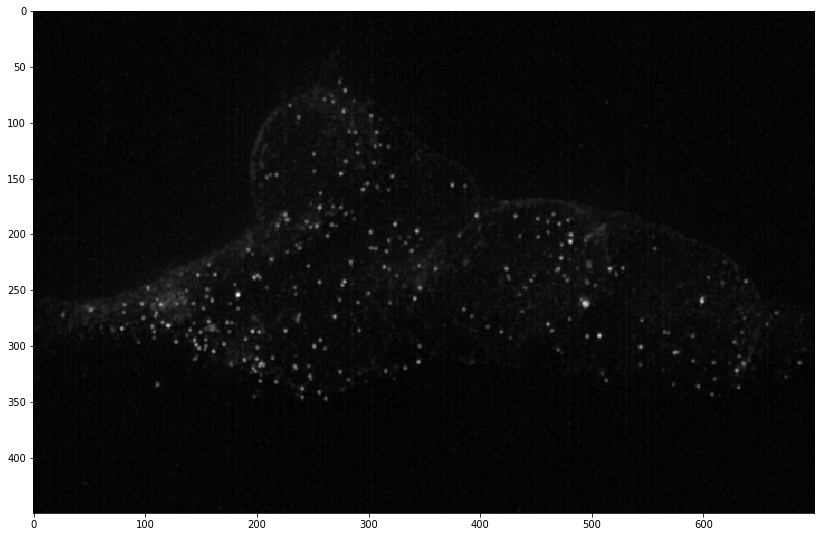

In [3]:
show_workers = False
show_clusters = False
clustering_params = None
sa.plot_annotations(anno_one_image, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

### Worker annotations only

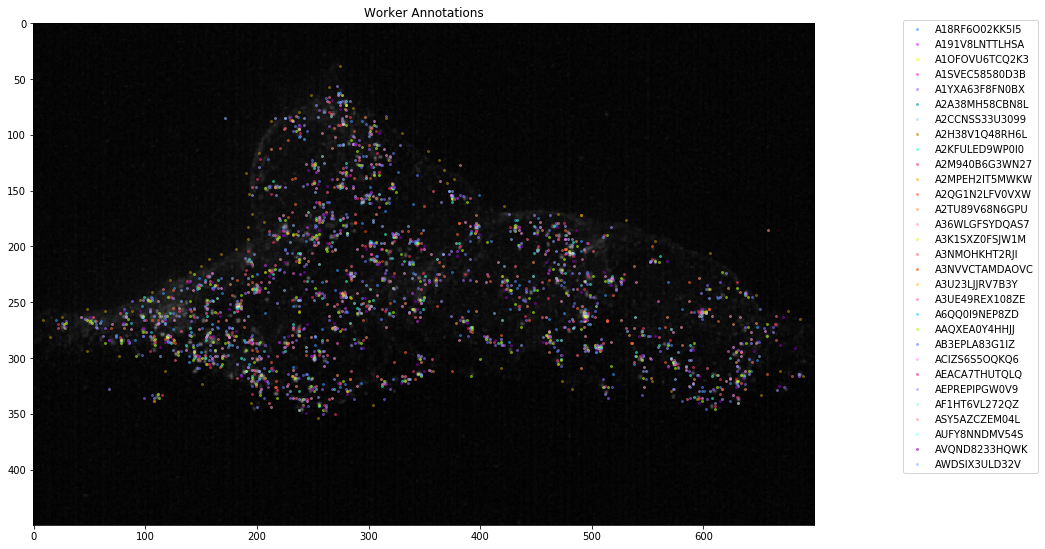

In [4]:
show_workers = True
sa.plot_annotations(anno_one_image, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

### Worker annotations and cluster centroids

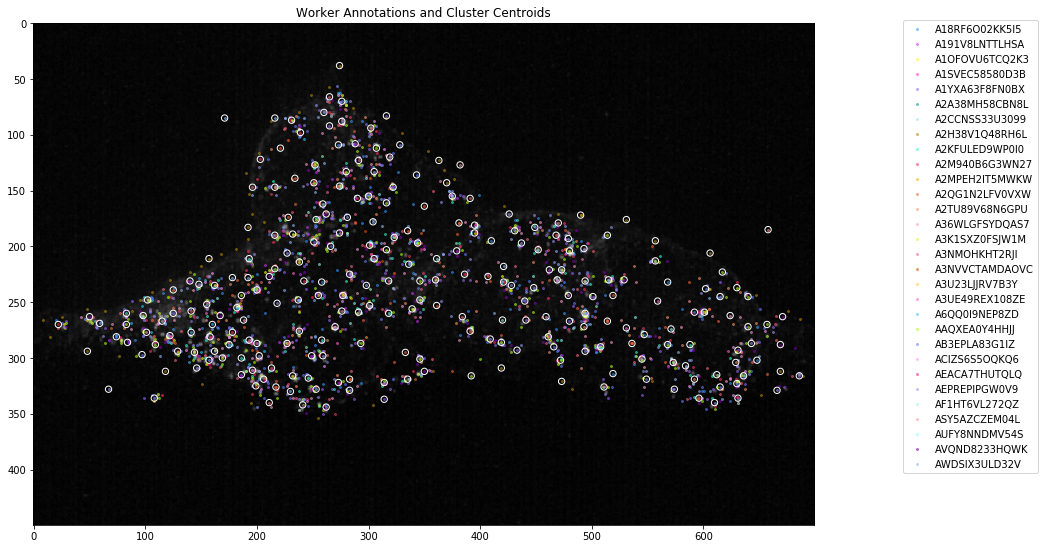

In [5]:
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
sa.plot_annotations(anno_one_image, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

### Cluster centroids only

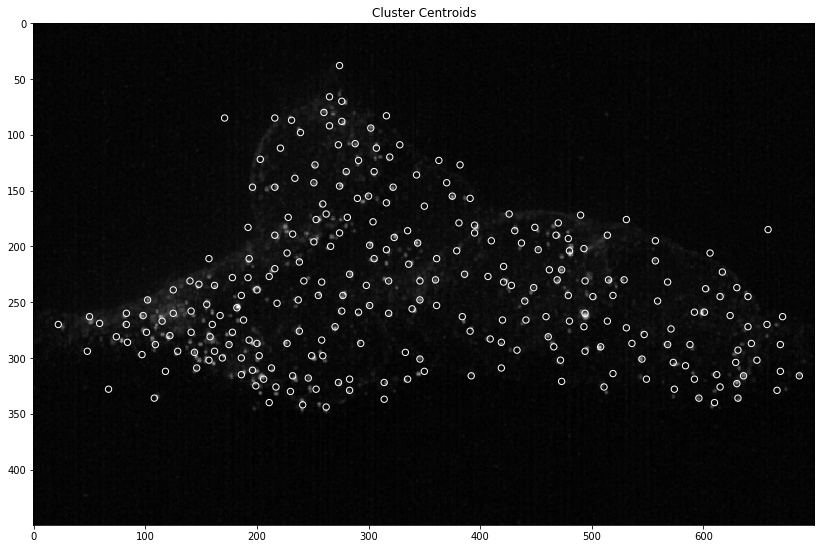

In [6]:
show_workers = False
sa.plot_annotations(anno_one_image, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

# Worker Average Speed

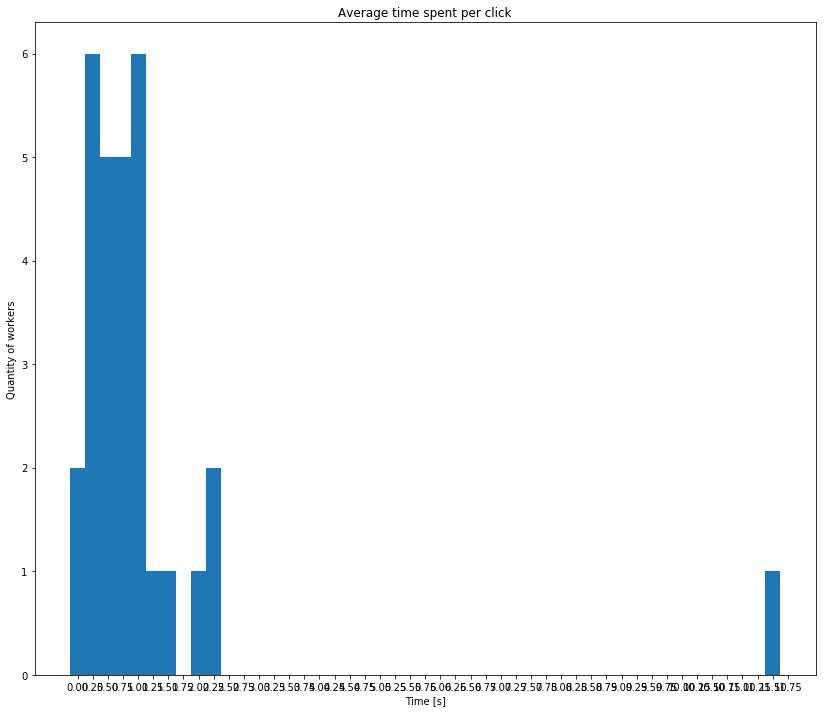

In [7]:
sa.plot_avg_time_per_click(anno_one_image, bigger_window_size)
bigger_window_size = True

# Total Time Spent by Each Worker
For each worker, plot total time spent (defined as the difference between the max timestamp and the min timestamp) vs. worker index. Each bar represents one worker.

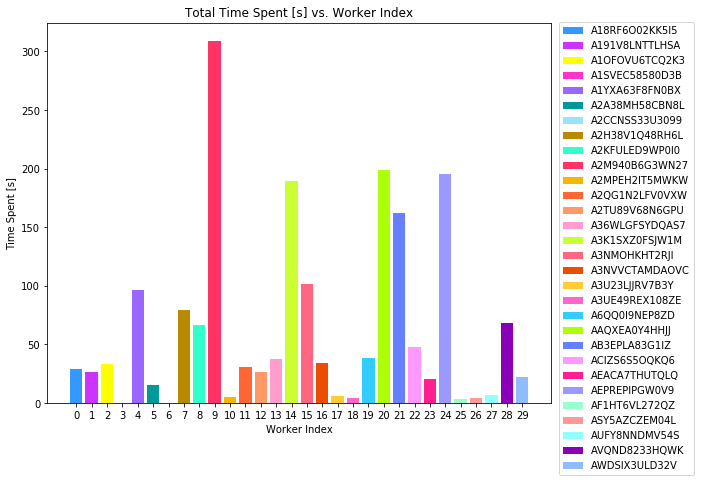

In [8]:
sa.plot_total_time_vs_worker_index(anno_one_image, img_filename)

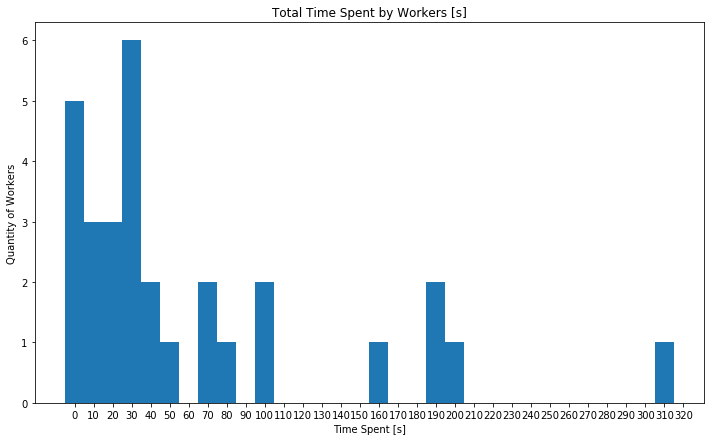

In [9]:
bigger_window_size = False
sa.plot_total_worker_time_hist(anno_one_image, bigger_window_size)

## Worker Pairwise Scores
For each worker, score = sum(pair scores of that worker).

Pair score for worker_A and worker_B 

= [(avg NND worker_A -> worker_B) + (avg NND worker_B -> worker_A)] / 2

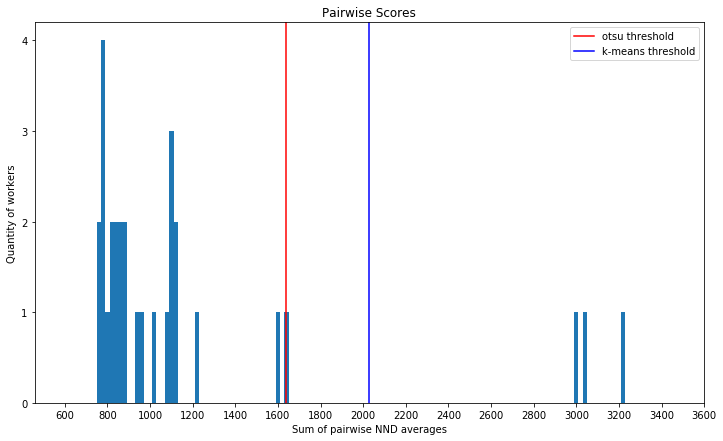

In [10]:
plot_title = "Pairwise Scores"
sa.plot_worker_pairwise_scores_hist(anno_one_image, plot_title, bigger_window_size)